# Librerías

In [1]:
import pandas as pd #manejo DataFrame
import numpy as np #Operaciones Aritmeticas
import seaborn as sns #Graficas
import matplotlib.pyplot as plt #Graficas
from sklearn.utils import resample
from scipy.stats import entropy as en
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
dataset = pd.read_csv("cardio.csv")

# Cambio de datos

In [ ]:
dataset['stroke'] = dataset['stroke'].replace({0: 'Sin ataque', 1: 'Ataque'})

In [ ]:
dataset['hypertension'] = dataset['hypertension'].replace({0: 'No', 1: 'Sí'})

In [ ]:
dataset['heart_disease'] = dataset['heart_disease'].replace({0: 'No', 1: 'Sí'})

In [ ]:
dataset['smoking_status'] = dataset['smoking_status'].replace({
    'Unknown': 'Desconocido',
    'formerly smoked': 'Fumó anteriormente',
    'never smoked': 'Nunca fumó',
    'smokes': 'Fuma'
})


In [ ]:
dataset['work_type'] = dataset['work_type'].replace({
    'Govt_job': 'Empleado público',
    'Never_worked': 'Nunca trabajó',
    'Private': 'Empleado privado',
    'Self-employed': 'Independiente',
    'children': 'Niño/a'
})


In [ ]:
dataset['gender'] = dataset['gender'].replace({
    'Male': 'Hombre',
    'Female': 'Mujer',
    'Other': 'Otro'
})

# Comprensión de los Datos

In [ ]:
dataset.head(50)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Hombre,67.000000,No,Sí,Yes,Empleado privado,Urban,228.690000,36.600000,Fumó anteriormente,Ataque
1,51676,Mujer,61.000000,No,No,Yes,Independiente,Rural,202.210000,NaN,Nunca fumó,Ataque
2,31112,Hombre,80.000000,No,Sí,Yes,Empleado privado,Rural,105.920000,32.500000,Nunca fumó,Ataque
3,60182,Mujer,49.000000,No,No,Yes,Empleado privado,Urban,171.230000,34.400000,Fuma,Ataque
4,1665,Mujer,79.000000,Sí,No,Yes,Independiente,Rural,174.120000,24.000000,Nunca fumó,Ataque
5,56669,Hombre,81.000000,No,No,Yes,Empleado privado,Urban,186.210000,29.000000,Fumó anteriormente,Ataque
6,53882,Hombre,74.000000,Sí,Sí,Yes,Empleado privado,Rural,70.090000,27.400000,Nunca fumó,Ataque
7,10434,Mujer,69.000000,No,No,No,Empleado privado,Urban,94.390000,22.800000,Nunca fumó,Ataque
8,27419,Mujer,59.000000,No,No,Yes,Empleado privado,Rural,76.150000,NaN,Desconocido,Ataque
9,60491,Mujer,78.000000,No,No,Yes,Empleado privado,Urban,58.570000,24.200000,Desconocido,Ataque


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


Se necesita saber el total de los datos faltantes de cada item.

In [ ]:

dataset.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
dataset.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Reemplazar los vacíos existentes en bmi con la media

In [ ]:
dataset['bmi']=dataset['bmi'].replace(np.nan, 28.8)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,28.800000,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.000000,1,0,Yes,Private,Urban,83.750000,28.800000,never smoked,0
5106,44873,Female,81.000000,0,0,Yes,Self-employed,Urban,125.200000,40.000000,never smoked,0
5107,19723,Female,35.000000,0,0,Yes,Self-employed,Rural,82.990000,30.600000,never smoked,0
5108,37544,Male,51.000000,0,0,Yes,Private,Rural,166.290000,25.600000,formerly smoked,0


Revisión de nulos rellenados

In [ ]:
dataset.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Clasificación de la glucosa promedio por medio de rangos

In [ ]:
def clasificar_glucosa(valor):
    if valor < 70:
        return 'Bajo'
    elif valor <= 99:
        return 'Normal'
    else:
        return 'Alto'

dataset['avg_glucose_level'] = dataset['avg_glucose_level'].apply(clasificar_glucosa)


Clasificación de BMI por rangos y reemplazarlo

In [ ]:
def clasificar_bmi(valor):
    if valor < 19:
        return 'Bajo de peso'
    elif valor <= 25:
        return 'Peso normal'
    else:
        return ' Sobrepeso'

dataset['bmi'] = dataset['bmi'].apply(clasificar_bmi)

Clasificar la edad por rangos y generar nueva columna

In [ ]:
def clasificar_edad(edad):
    if edad <= 20:
        return 'joven'
    elif 21 <= edad <= 60:
        return 'adulto'
    else:
        return 'adulto mayor'

dataset['Rango_edad'] = dataset['age'].apply(clasificar_edad)

Revisión de cambios realizados

In [ ]:
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Rango_edad
0,9046,Hombre,67.0,No,Sí,Yes,Empleado privado,Urban,Alto,Sobrepeso,Fumó anteriormente,Ataque,adulto mayor
1,51676,Mujer,61.0,No,No,Yes,Independiente,Rural,Alto,Sobrepeso,Nunca fumó,Ataque,adulto mayor
2,31112,Hombre,80.0,No,Sí,Yes,Empleado privado,Rural,Alto,Sobrepeso,Nunca fumó,Ataque,adulto mayor
3,60182,Mujer,49.0,No,No,Yes,Empleado privado,Urban,Alto,Sobrepeso,Fuma,Ataque,adulto
4,1665,Mujer,79.0,Sí,No,Yes,Independiente,Rural,Alto,Peso normal,Nunca fumó,Ataque,adulto mayor


# Análisis bivariado


Género vs ACV

In [ ]:
dataset.groupby(['gender', 'stroke']).size()


gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
dtype: int64

edad vs ACV

<Axes: xlabel='stroke', ylabel='age'>

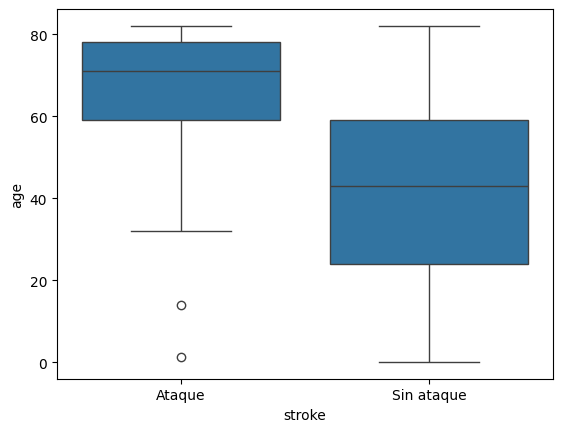

In [ ]:
sns.boxplot(dataset, x="stroke", y="age")


Hipertension vs ACV

In [ ]:
dataset.groupby(['hypertension', 'stroke']).size()

hypertension  stroke    
No            Ataque         183
              Sin ataque    4429
Sí            Ataque          66
              Sin ataque     432
dtype: int64

Estado civil vs ACV

In [ ]:
dataset.groupby(['ever_married', 'stroke']).size()

ever_married  stroke    
No            Ataque          29
              Sin ataque    1728
Yes           Ataque         220
              Sin ataque    3133
dtype: int64

Análisis: El 1% de las personas que no se casan sufren ataques, y el 6% de las personas que se casan sufren ataques, lo que significa que las personas que se casan son más propensas a sufrir un ACV

Enfermedades cardiacas vs ACV

In [ ]:
dataset.groupby(['heart_disease', 'stroke']).size()

heart_disease  stroke    
No             Ataque         202
               Sin ataque    4632
Sí             Ataque          47
               Sin ataque     229
dtype: int64

Tipo de trabajo vs ACV


In [ ]:
dataset.groupby(['work_type', 'stroke']).size()

work_type         stroke    
Empleado privado  Ataque         149
                  Sin ataque    2776
Empleado público  Ataque          33
                  Sin ataque     624
Independiente     Ataque          65
                  Sin ataque     754
Niño/a            Ataque           2
                  Sin ataque     685
Nunca trabajó     Sin ataque      22
dtype: int64

Fumador vs ACV

In [ ]:
dataset.groupby(['smoking_status', 'stroke']).size()

smoking_status      stroke    
Desconocido         Ataque          47
                    Sin ataque    1497
Fuma                Ataque          42
                    Sin ataque     747
Fumó anteriormente  Ataque          70
                    Sin ataque     815
Nunca fumó          Ataque          90
                    Sin ataque    1802
dtype: int64

Nivel de glucosa vs ACV

In [ ]:
dataset.groupby(['avg_glucose_level', 'stroke']).size()

avg_glucose_level  stroke    
Alto               Ataque         138
                   Sin ataque    1901
Bajo               Ataque          27
                   Sin ataque     727
Normal             Ataque          84
                   Sin ataque    2233
dtype: int64

Gráfica nivel de glucosa vs ACV

<Axes: xlabel='avg_glucose_level', ylabel='count'>

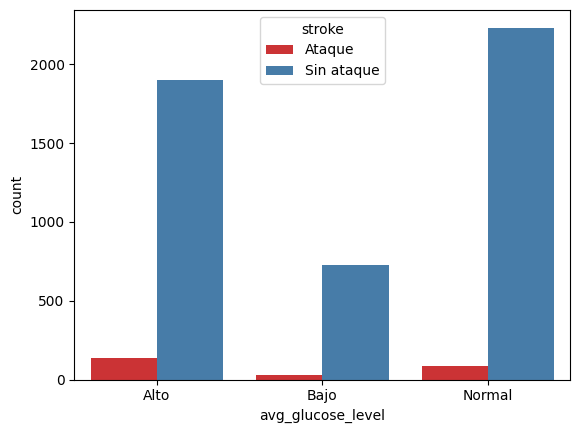

In [ ]:
grupo = dataset.groupby(['avg_glucose_level', 'stroke']).size().reset_index(name='count')

sns.barplot(data=grupo, x='avg_glucose_level', y='count', hue='stroke', palette='Set1')

Nivel de BMI vs ACV

In [ ]:
dataset.groupby(['bmi', 'stroke']).size()

bmi           stroke    
 Sobrepeso    Ataque         211
              Sin ataque    3292
Bajo de peso  Ataque           1
              Sin ataque     403
Peso normal   Ataque          37
              Sin ataque    1166
dtype: int64

Rangos de edad vs ACV

In [ ]:
dataset.groupby(['Rango_edad', 'stroke']).size()

Rango_edad    stroke
adulto        0         2711
              1           70
adulto mayor  0         1127
              1          177
joven         0         1023
              1            2
dtype: int64

## Preparación de los Datos

Borrar columna ID

In [ ]:
if 'id' in dataset.columns:
    dataset.drop('id', axis=1, inplace=True)

Distribución de la variable objetivo


<Axes: xlabel='stroke', ylabel='count'>

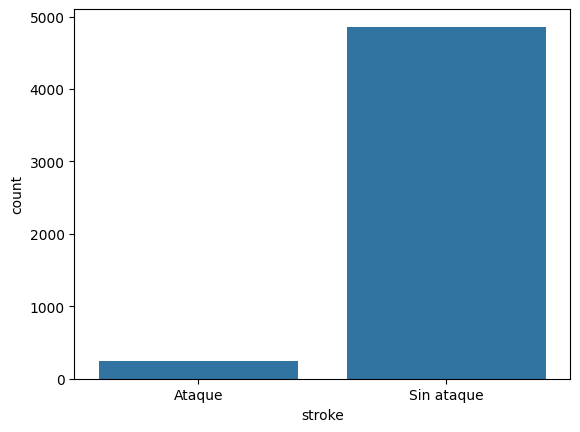

In [ ]:
sns.countplot(x='stroke', data=dataset)


In [ ]:
dataset["stroke"].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


desbalance, buen accuracy

# **Listado de variables**

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,NaN,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.000000,1,0,Yes,Private,Urban,83.750000,NaN,never smoked,0
5106,44873,Female,81.000000,0,0,Yes,Self-employed,Urban,125.200000,40.000000,never smoked,0
5107,19723,Female,35.000000,0,0,Yes,Self-employed,Rural,82.990000,30.600000,never smoked,0
5108,37544,Male,51.000000,0,0,Yes,Private,Rural,166.290000,25.600000,formerly smoked,0


In [ ]:
dataset['stroke'].value_counts()

,count
stroke,
0,4861
1,249


In [ ]:
def entropia(p1, p0):
    total = p1 + p0
    if p1 == 0 or p0 == 0:
        return 0
    return -(p1/total)*math.log2(p1/total) - (p0/total)*math.log2(p0/total)




In [ ]:
x = 4861
y= 249
z= x+y

H = entropia(x,y)
print("Entropía inicial del conjunto de datos")
H

Entropía inicial del conjunto de datos


0.28096875511730324

In [ ]:
#IG(gender)
xm1=141
xm0=2853
ym=xm1+xm0

xh1=108
xh0=2007
yh=xh1+xh0

xo1=0
xo0=1
yo=xo1+xo0

hm = entropia(xm1,xm0)
hh = entropia(xh1,xh0)
ho = entropia(xo1,xo0)


#ganancia
GanGen = H-((ym/z)*hm)-((yh/z)*hh)-((yo/z)*ho)

GanGen

7.332711044193141e-05

In [ ]:
#IG(age)
xj1=2
xj0=1023
yj=xj1+xj0

xa1=70
xa0=2711
ya=xa1+xa0

xam1=177
xam0=1127
yam=xam1+xam0

hj = entropia(xj1,xj0)
ha = entropia(xa1,xa0)
ham = entropia(xam1,xam0)

#ganancia
GanAge = H-((yj/z)*hj)-((ya/z)*ha)-((yam/z)*ham)

GanAge

0.03838898555357506

In [ ]:
#IG(hypertension)
xs1=66
xs0=432
ys=xs1+xs0

xn1=183
xn0=4429
yn=xn1+xn0

hs = entropia(xs1,xs0)
hn = entropia(xn1,xn0)

#ganancia
GanHype = H-((ys/z)*hs)-((yn/z)*hn)

GanHype

0.008621115929132117

In [ ]:
#IG(heart_disease)
xsh1=47
xsh0=229
ysh=xsh1+xsh0

xnh1=202
xnh0=4632
ynh=xnh1+xnh0

hsh = entropia(xsh1,xsh0)
hnh = entropia(xnh1,xnh0)
#ganancia
GanHeart = H-((ysh/z)*hsh)-((ynh/z)*hnh)

GanHeart

0.008507329652617246

In [ ]:
#IG(ever_married)
xsm1=220
xsm0=3133
ysm=xsm1+xsm0

xnm1=29
xnm0=1728
ynm=xnm1+xnm0

hsm = entropia(xsm1,xsm0)
hnm = entropia(xnm1,xnm0)
#ganancia
GanMarry = H-((ysm/z)*hsm)-((ynm/z)*hnm)

GanMarry

0.010026409159932227

In [ ]:
#IG(work_type)
xpr1=149
xpr0=2776
ypr=xpr1+xpr0

xpu1=33
xpu0=624
ypu=xpu1+xpu0

xin1=65
xin0=754
yin=xin1+xin0

xni1=2
xni0=685
yni=xni1+xni0

xnu1=0
xnu0=22
ynu=xnu1+xnu0

hpr = entropia(xpr1,xpr0)
hpu = entropia(xpu1,xpu0)
hin = entropia(xin1,xin0)
hni = entropia(xni1,xni0)
hnu = entropia(xnu1,xnu0)

#ganancia
GanWork = H-((ypr/z)*hpr)-((ypu/z)*hpu)-((yin/z)*hin)-((yni/z)*hni)-((ynu/z)*hnu)

GanWork

0.009847009983427189

In [ ]:
#IG(Smoking_status)
xdes1=47
xdes0=1497
ydes=xdes1+xdes0

xfu1=42
xfu0=747
yfu=xfu1+xfu0

xnun1=90
xnun0=1802
ynun=xnun1+xnun0

xexf1=70
xexf0=815
yexf=xexf1+xexf0

hdes = entropia(xdes1,xdes0)
hfu = entropia(xfu1,xfu0)
hnun = entropia(xnun1,xnun0)
hexf = entropia(xexf1,xexf0)

#ganancia
GanSmoke = H-((ydes/z)*hdes)-((yfu/z)*hfu)-((ynun/z)*hnun)-((yexf/z)*hexf)

GanSmoke

0.003968124837943399

In [ ]:
#IG(avg_glucose_level)
xalt1=138
xalt0=1901
yalt=xalt1+xalt0

xbaj1=27
xbaj0=727
ybaj=xbaj1+xbaj0

xnor1=84
xnor0=2233
ynor=xnor1+xnor0

halt = entropia(xalt1,xalt0)
hbaj = entropia(xbaj1,xbaj0)
hnor = entropia(xnor1,xnor0)

#ganancia
GanGluco = H-((yalt/z)*halt)-((ybaj/z)*hbaj)-((ynor/z)*hnor)

GanGluco

0.0036204562110482563

In [ ]:
#IG(bmi)
xpnor1=37
xpnor0=1166
ypnor=xpnor1+xpnor0

xpbaj1=1
xpbaj0=403
ypbaj=xpbaj1+xpbaj0

xsobp1=211
xsobp0=3292
ysobp=xsobp1+xsobp0

hpnor = entropia(xpnor1,xpnor0)
hpbaj = entropia(xpbaj1,xpbaj0)
hsobp = entropia(xsobp1,xsobp0)

#ganancia
GanBMI = H-((ypnor/z)*hpnor)-((ypbaj/z)*hpbaj)-((ysobp/z)*hsobp)

GanBMI

0.007232669710621614

In [ ]:
# Función para calcular entropía de una columna (target)
def calcular_entropia(columna):
    prob = columna.value_counts(normalize=True)
    return scipy_entropy(prob, base=2)  # Esto calcula H(Y)

# Cálculo de ganancia de información de un atributo respecto al objetivo
def ganancia_informacion(dataset, atributo, objetivo):
    entropia_total = calcular_entropia(dataset[objetivo])
    entropia_condicional = 0

    # Inicializamos la entropía condicional
    valores = dataset[atributo].unique()  # Valores únicos del atributo
    entropia_condicional = 0.0

    # Para cada valor único del atributo, calculamos la entropía condicional
    for valor in valores:
        subconjunto = dataset[dataset[atributo] == valor]
        peso = len(subconjunto) / len(dataset)  # Peso del subconjunto
        entropia_sub = calcular_entropia(subconjunto[objetivo])  # Entropía del subconjunto
        entropia_condicional += peso * entropia_sub  # Sumar la entropía ponderada

    # La ganancia de información es la diferencia entre la entropía total y la condicional
    return entropia_total - entropia_condicional

# Evaluar todas las variables para calcular su ganancia de información respecto a 'stroke'
def evaluar_variables(dataset, objetivo):
    variables = [col for col in dataset.columns if col != objetivo]  # Excluimos la columna objetivo
    resultados = []

    for var in variables:
        ig = ganancia_informacion(dataset, var, objetivo)  # Calculamos la ganancia de información
        resultados.append((var, ig))  # Guardamos el nombre de la variable y su ganancia de información

    # Retornamos un DataFrame ordenado por ganancia de información de mayor a menor
    return pd.DataFrame(resultados, columns=['Variable', 'Ganancia_Información']).sort_values(by='Ganancia_Información', ascending=False)

# Uso del código para obtener la ganancia de información de todas las variables respecto a 'stroke'
resultado_id3 = evaluar_variables(dataset, 'stroke')
print(resultado_id3)

             Variable  Ganancia_Información
0                  id              0.280969
2                 age              0.064441
11         Rango_edad              0.038389
5        ever_married              0.010026
6           work_type              0.009847
3        hypertension              0.008621
4       heart_disease              0.008507
9                 bmi              0.007233
10     smoking_status              0.003968
8   avg_glucose_level              0.003620
7      Residence_type              0.000173
1              gender              0.000073


### MODELADO

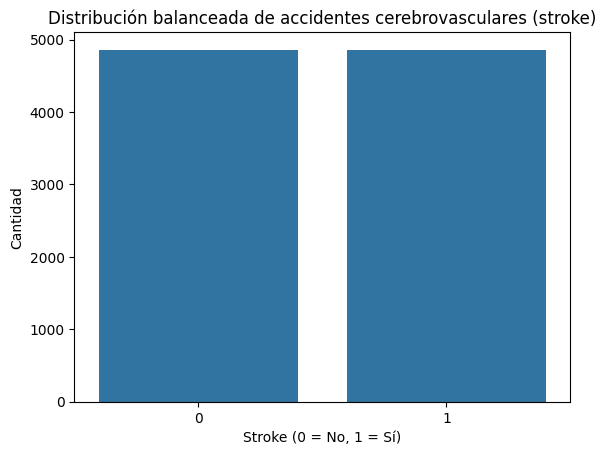

In [ ]:
dataset_majority = dataset[dataset.stroke == 0]
dataset_minority = dataset[dataset.stroke == 1]

# Sobremuestreo de la clase minoritaria
df_minority_oversampled = resample(
    dataset_minority,
    replace=True,        # Muestreo con reemplazo
    n_samples=len(dataset_majority),  # Mismo tamaño que la clase mayoritaria
    random_state=42      # Semilla para reproducibilidad
)

# Combinar los datos balanceados
dataset_balanced = pd.concat([dataset_majority, df_minority_oversampled])

# Visualización del balanceo
sns.countplot(x='stroke', data=dataset_balanced)
plt.title("Distribución balanceada de accidentes cerebrovasculares (stroke)")
plt.xlabel("Stroke (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
dataset["stroke"].value_counts()

,count
stroke,
0,4861
1,249


\n=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1458
           1       0.20      0.15      0.17        75

    accuracy                           0.93      1533
   macro avg       0.58      0.56      0.57      1533
weighted avg       0.92      0.93      0.92      1533

\n=== Métrica ROC-AUC ===
ROC-AUC Score: 0.7884


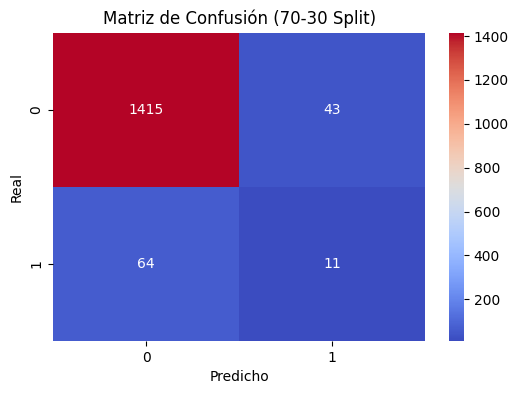

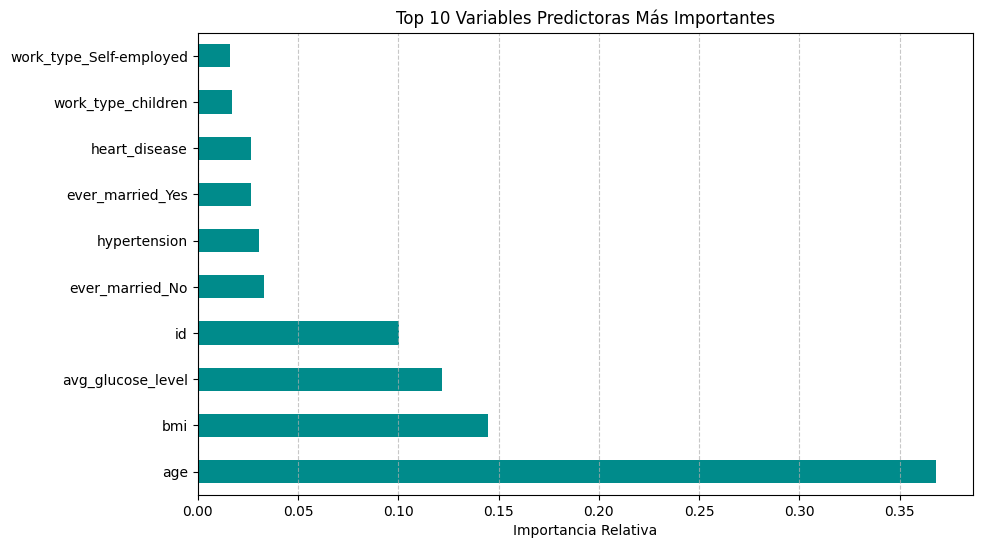

KeyboardInterrupt: 

In [ ]:

# ======================================================
# 1. Preprocesamiento y Modelado
# ======================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables
X = dataset.drop('stroke', axis=1)
y = dataset['stroke']

# Split 70-30 estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Configurar preprocesamiento
numericas = X.select_dtypes(include=['int64', 'float64']).columns
categoricas = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
    ])

# Pipeline completo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ))
])

# Entrenamiento
model.fit(X_train, y_train)

# ======================================================
# 2. Evaluación del Modelo
# ======================================================
# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Métricas clave
print("\\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))

print("\\n=== Métrica ROC-AUC ===")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='coolwarm')
plt.title('Matriz de Confusión (70-30 Split)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Importancia de características
cat_features = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categoricas)
all_features = list(numericas) + list(cat_features)

importances = model.named_steps['classifier'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='barh', color='darkcyan')
plt.title('Top 10 Variables Predictoras Más Importantes')
plt.xlabel('Importancia Relativa')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ======================================================
# 3. Optimización Adicional (Opcional)
# ======================================================
# Hiperparámetros para ajuste fino
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5]
}

# Ejecutar GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"\\nMejores parámetros: {grid_search.best_params_}")